In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

In [ ]:
df1 = pd.read_csv("twitter_training.csv")
df1

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
cols=['tweetid', 'entity', 'sentiment', 'content']
df = pd.read_csv('twitter_training.csv', names=cols)
df

,tweetid,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df.head(15)

,tweetid,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
df.tail(15)

,tweetid,entity,sentiment,content
74667,9198,Nvidia,Negative,Nvidia really delayed the 3070 several weeks.
74668,9198,Nvidia,Negative,Nvidia really only delayed the 3070 2 flight w...
74669,9198,Nvidia,Negative,Nvidia really delayed the next 2 weeks.
74670,9199,Nvidia,Positive,Let no elim go unnoticed. . . . NVIDIA Highlig...
74671,9199,Nvidia,Positive,t let Elim go unnoticed.... NVIDIA Highlights ...
74672,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74674,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74675,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74676,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetid    74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of        tweetid       entity sentiment  \
0         2401  Borderlands  Positive   
1         2401  Borderlands  Positive   
2         2401  Borderlands  Positive   
3         2401  Borderlands  Positive   
4         2401  Borderlands  Positive   
...        ...          ...       ...   
74677     9200       Nvidia  Positive   
74678     9200       Nvidia  Positive   
74679     9200       Nvidia  Positive   
74680     9200       Nvidia  Positive   
74681     9200       Nvidia  Positive   

                                                 content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]>

In [ ]:
df.isna().sum()

tweetid        0
entity         0
sentiment      0
content      686
dtype: int64

In [ ]:
df.dropna(axis=0 , inplace=True)
df.isna().sum()

tweetid      0
entity       0
sentiment    0
content      0
dtype: int64

In [ ]:
df.duplicated().sum()

2340

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
cols=['tweetid', 'entity', 'sentiment', 'content']
df2 = pd.read_csv('twitter_validation.csv', names=cols)
df2

,tweetid,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df2.head(15)

,tweetid,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetid    1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   object
 3   content    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df2.describe

<bound method NDFrame.describe of      tweetid               entity   sentiment  \
0       3364             Facebook  Irrelevant   
1        352               Amazon     Neutral   
2       8312            Microsoft    Negative   
3       4371                CS-GO    Negative   
4       4433               Google     Neutral   
..       ...                  ...         ...   
995     4891  GrandTheftAuto(GTA)  Irrelevant   
996     4359                CS-GO  Irrelevant   
997     2652          Borderlands    Positive   
998     8069            Microsoft    Positive   
999     6960      johnson&johnson     Neutral   

                                               content  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]>

In [ ]:
df2.isna().sum()

tweetid      0
entity       0
sentiment    0
content      0
dtype: int64

In [ ]:
df2.duplicated().sum()

0

In [ ]:
target_counts = df['sentiment'].value_counts()
target_counts

sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

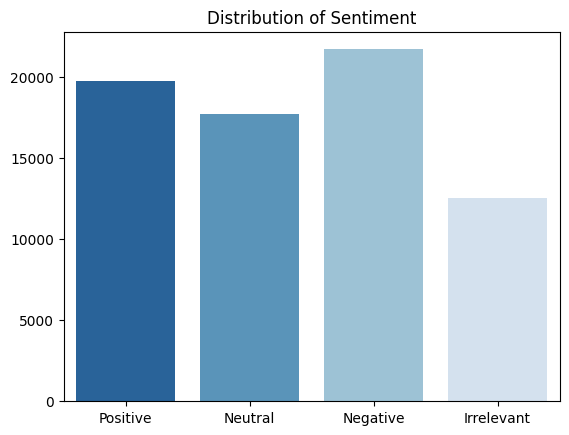

In [ ]:
 sns.countplot(data=df, x='sentiment', palette='Blues_r')
 plt.title('Distribution of Sentiment')
 plt.xlabel('')
 plt.ylabel('')
 plt.show()

sentiment
Neutral       773
Negative      690
Irrelevant    672
Positive      154
Name: count, dtype: int64


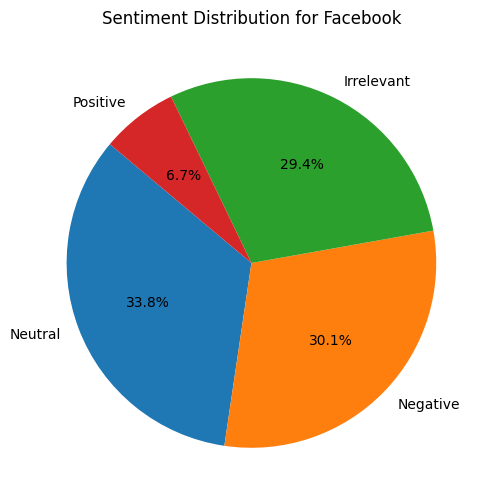

In [ ]:
entity_data = df[df['entity'].str.contains('Facebook', case=False)]
entity_target_counts = entity_data['sentiment'].value_counts()
print(entity_target_counts)

plt.figure(figsize=(6, 6))
plt.pie(entity_target_counts, labels=entity_target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Facebook')
plt.show()

sentiment
Negative      1401
Positive      1243
Irrelevant    1205
Neutral        707
Name: count, dtype: int64


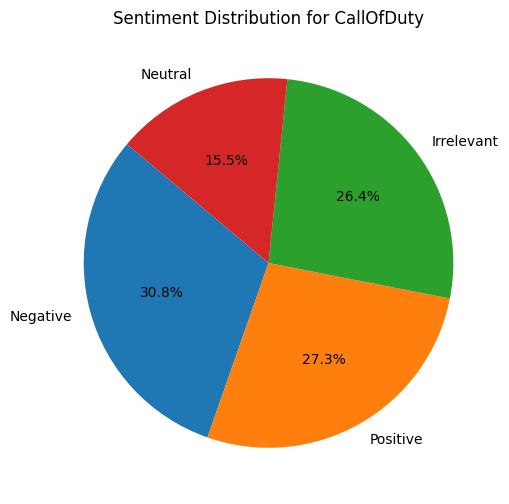

In [ ]:
entity_data = df[df['entity'].str.contains('CallOfDuty', case=False)]
entity_target_counts = entity_data['sentiment'].value_counts()
print(entity_target_counts)

plt.figure(figsize=(6, 6))
plt.pie(entity_target_counts, labels=entity_target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for CallOfDuty')
plt.show()

sentiment
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64


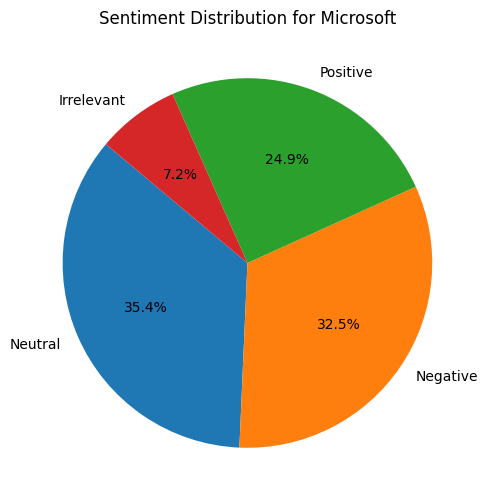

In [ ]:
entity_data = df[df['entity'].str.contains('Microsoft', case=False)]
entity_target_counts = entity_data['sentiment'].value_counts()
print(entity_target_counts)

plt.figure(figsize=(6, 6))
plt.pie(entity_target_counts, labels=entity_target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()

sentiment
Neutral       1197
Negative       565
Positive       302
Irrelevant     185
Name: count, dtype: int64


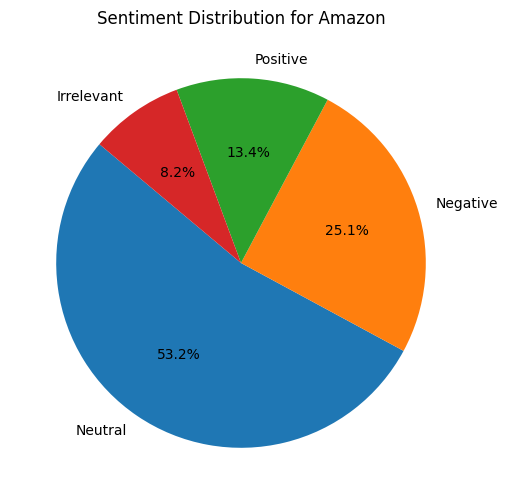

In [ ]:
entity_data = df[df['entity'].str.contains('Amazon', case=False)]
entity_target_counts = entity_data['sentiment'].value_counts()
print(entity_target_counts)

plt.figure(figsize=(6, 6))
plt.pie(entity_target_counts, labels=entity_target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Amazon')
plt.show()

sentiment
Negative      1127
Irrelevant     538
Positive       473
Neutral        100
Name: count, dtype: int64


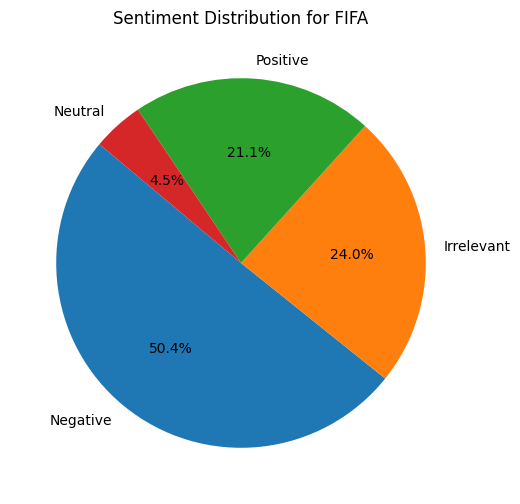

In [ ]:
entity_data = df[df['entity'].str.contains('FIFA', case=False)]
entity_target_counts = entity_data['sentiment'].value_counts()
print(entity_target_counts)

plt.figure(figsize=(6, 6))
plt.pie(entity_target_counts, labels=entity_target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for FIFA')
plt.show()

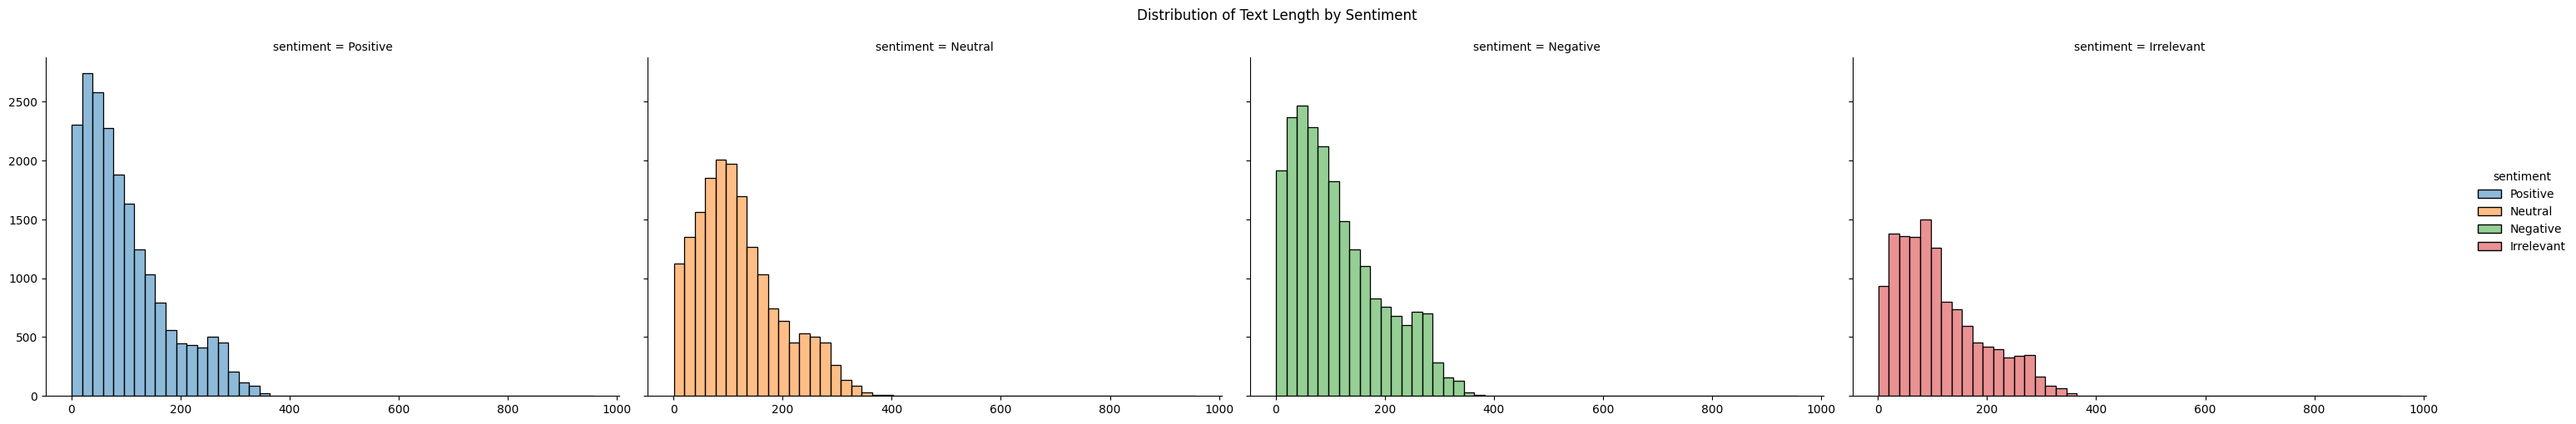

In [ ]:
df['text_length'] = df['content'].str.len()

displot = sns.displot(
    data=df,
    x='text_length',
    bins=50,
    col='sentiment',
    hue='sentiment',
    aspect=1.5
)

displot.fig.suptitle('Distribution of Text Length by Sentiment', y=1.05)
displot.set_axis_labels('', '')
plt.show()

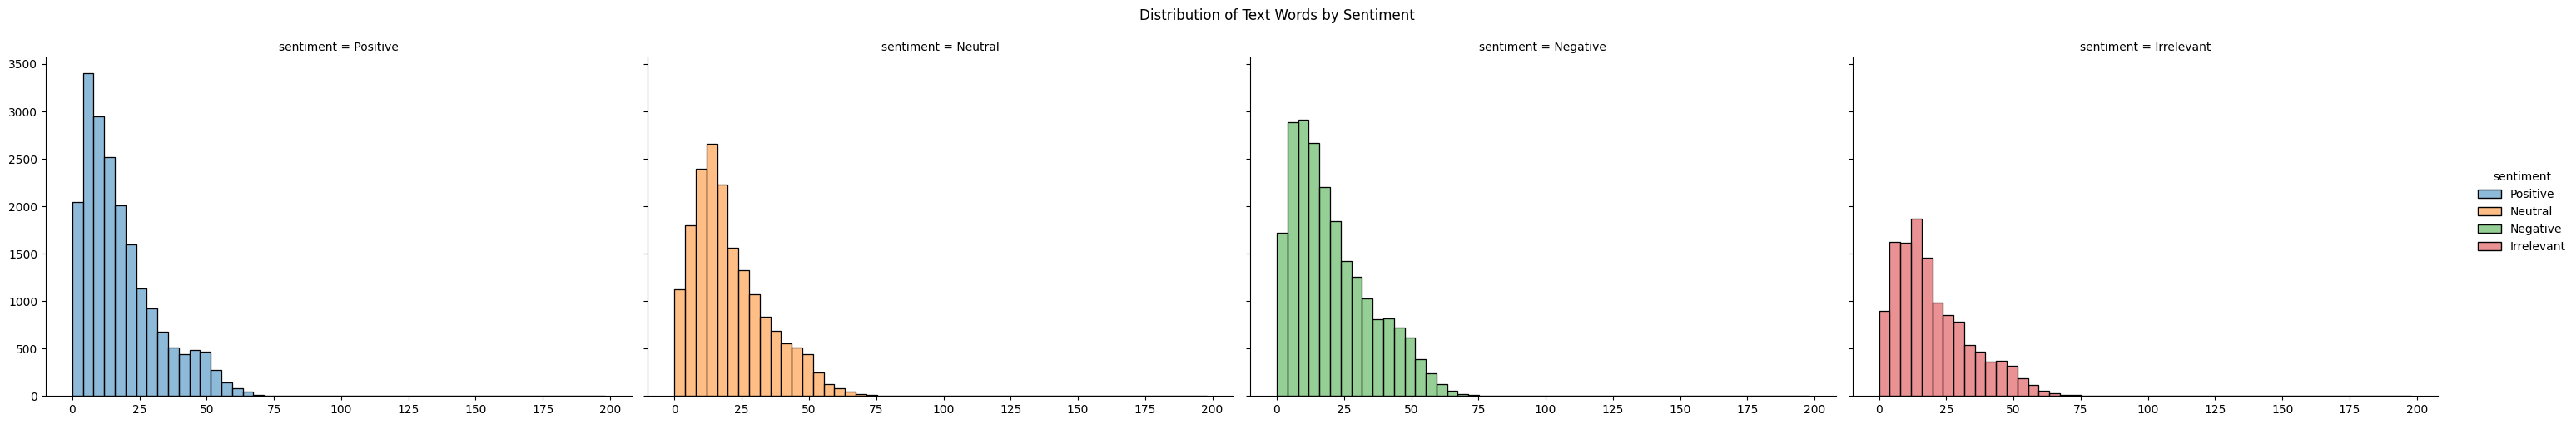

In [ ]:
df['text_words'] = df['content'].str.split().str.len()

displot = sns.displot(
    data=df,
    x='text_words',
    bins=50,
    col='sentiment',
    hue='sentiment',
    aspect=1.5
)

displot.fig.suptitle('Distribution of Text Words by Sentiment', y=1.05)
displot.set_axis_labels('', '')
plt.show()

In [ ]:
def create_freq_df2(tokens):
    freq_dist = nltk.FreqDist(tokens)
    df2 = pd.DataFrame.from_dict(freq_dist, orient='index')
    df2.columns = ['Frequency']
    df2.index.name = 'Token'
    return df2.sort_values(by='Frequency', ascending=False).reset_index()

def create_top15_words(df2, title, color, ax):
    sns.barplot(data=df2.head(15), x='Token', y='Frequency', palette=color, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')

def create_wordcloud(df2, title, color, ax):
    data = df2.set_index('Token').to_dict()['Frequency']
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=100,
        max_font_size=200,
        min_font_size=1,
        colormap=color,
        background_color='white',
        random_state=42
    ).generate_from_frequencies(data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=16)
    ax.axis('off')


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

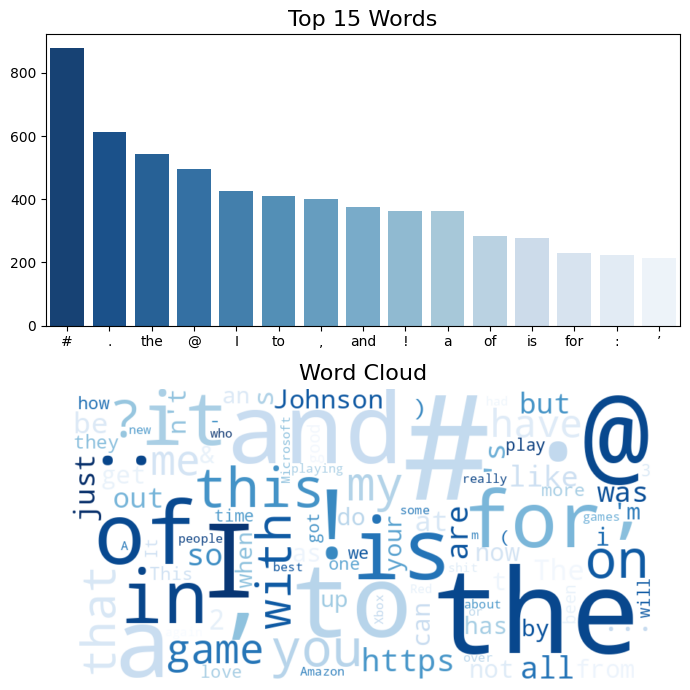

In [ ]:
tokens = word_tokenize(' '.join(df2['content']))
freq_df2 = create_freq_df2(tokens)
fig, (bar_ax, cloud_ax) = plt.subplots(2, figsize=(7, 7))
create_top15_words(freq_df2, 'Top 15 Words', 'Blues_r', bar_ax)
create_wordcloud(freq_df2, 'Word Cloud', 'Blues_r', cloud_ax)
plt.tight_layout()
plt.show()

In [ ]:
def get_tokens(label):
 concatenated_posts = ' '.join(df2.loc[df2['sentiment'] == label, 'content'])
 return word_tokenize(concatenated_posts)

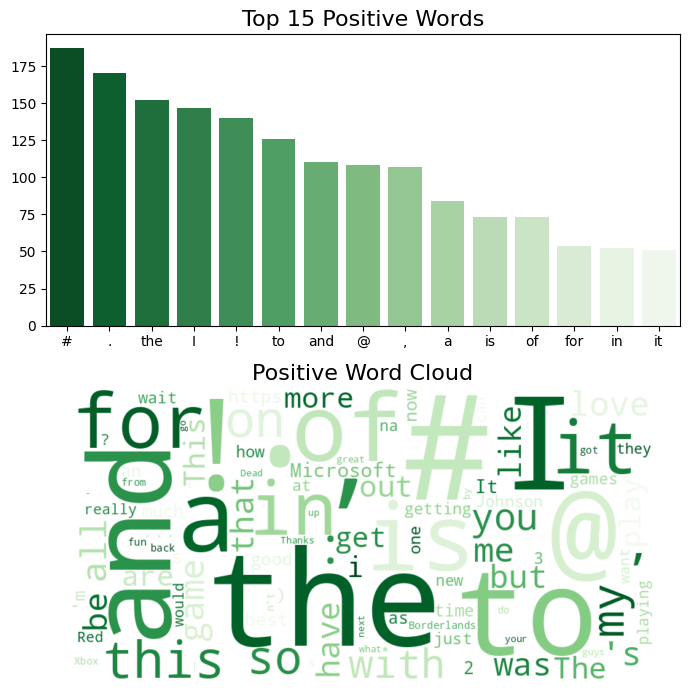

In [ ]:
 tokens = get_tokens('Positive')
 freq_df2 = create_freq_df2(tokens)
 fig, (bar_ax, cloud_ax) = plt.subplots(2, figsize=(7, 7))
 create_top15_words(freq_df2, 'Top 15 Positive Words', 'Greens_r', bar_ax)
 create_wordcloud(freq_df2, 'Positive Word Cloud', 'Greens_r', cloud_ax)
 plt.tight_layout()
 plt.show()

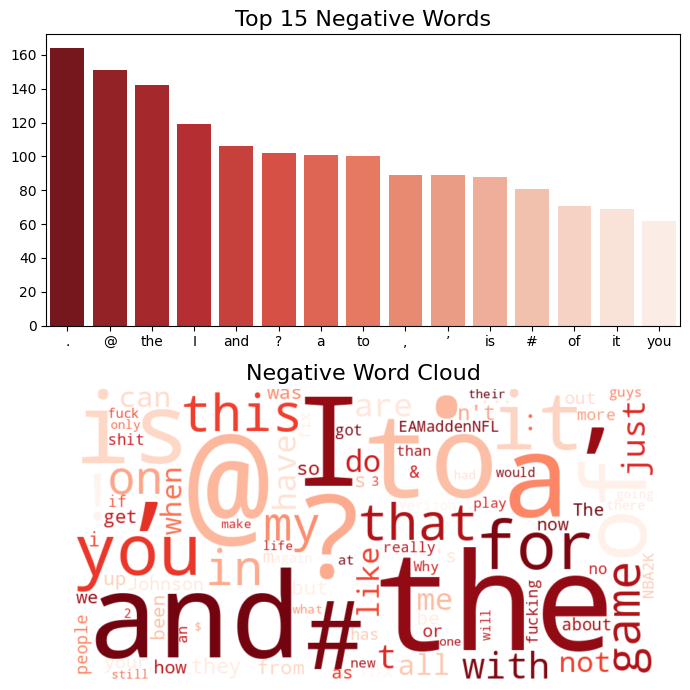

In [ ]:
 tokens = get_tokens('Negative')
 freq_df2 = create_freq_df2(tokens)
 fig, (bar_ax, cloud_ax) = plt.subplots(2, figsize=(7, 7))
 create_top15_words(freq_df2, 'Top 15 Negative Words', 'Reds_r', bar_ax)
 create_wordcloud(freq_df2, 'Negative Word Cloud', 'Reds_r', cloud_ax)
 plt.tight_layout()
 plt.show()

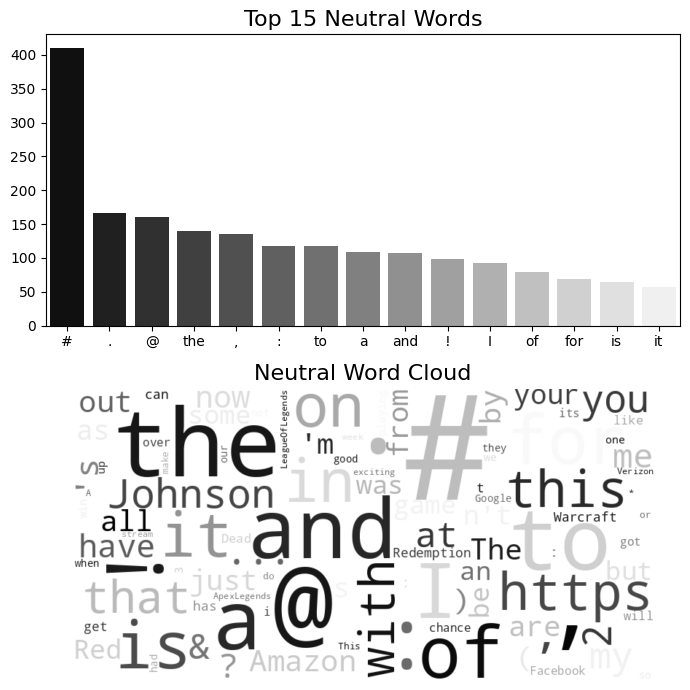

In [ ]:
 tokens = get_tokens('Neutral')
 freq_df2 = create_freq_df2(tokens)
 fig, (bar_ax, cloud_ax) = plt.subplots(2, figsize=(7, 7))
 create_top15_words(freq_df2, 'Top 15 Neutral Words', 'binary_r', bar_ax)
 create_wordcloud(freq_df2, 'Neutral Word Cloud', 'binary_r', cloud_ax)
 plt.tight_layout()
 plt.show()

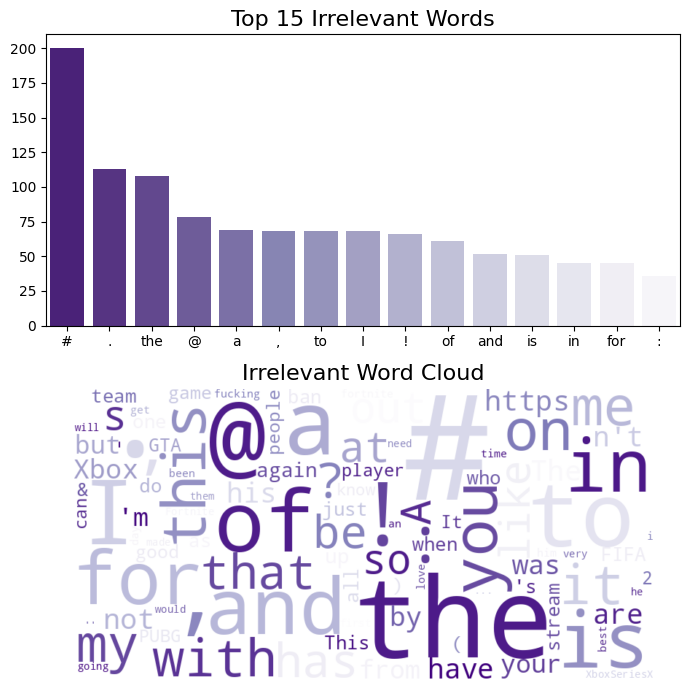

In [ ]:
 tokens = get_tokens('Irrelevant')
 freq_df2 = create_freq_df2(tokens)
 fig, (bar_ax, cloud_ax) = plt.subplots(2, figsize=(7, 7))
 create_top15_words(freq_df2, 'Top 15 Irrelevant Words', 'Purples_r', bar_ax)
 create_wordcloud(freq_df2, 'Irrelevant Word Cloud', 'Purples_r', cloud_ax)
 plt.tight_layout()
 plt.show()

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

 def get_top_text_ngrams(ngram):
  ngram_range = (ngram, ngram)
  corpus = df2['content']
  vectorizer = CountVectorizer(ngram_range=ngram_range).fit(corpus)
  bag_of_words = vectorizer.transform(corpus)
  ngram_counts = bag_of_words.sum(axis=0)
  ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  ngram_freq_df2 = pd.DataFrame(ngram_freq, columns=['N-grams', 'Frequency'])

  return ngram_freq_df2.sort_values('Frequency', ascending=False).head(15)

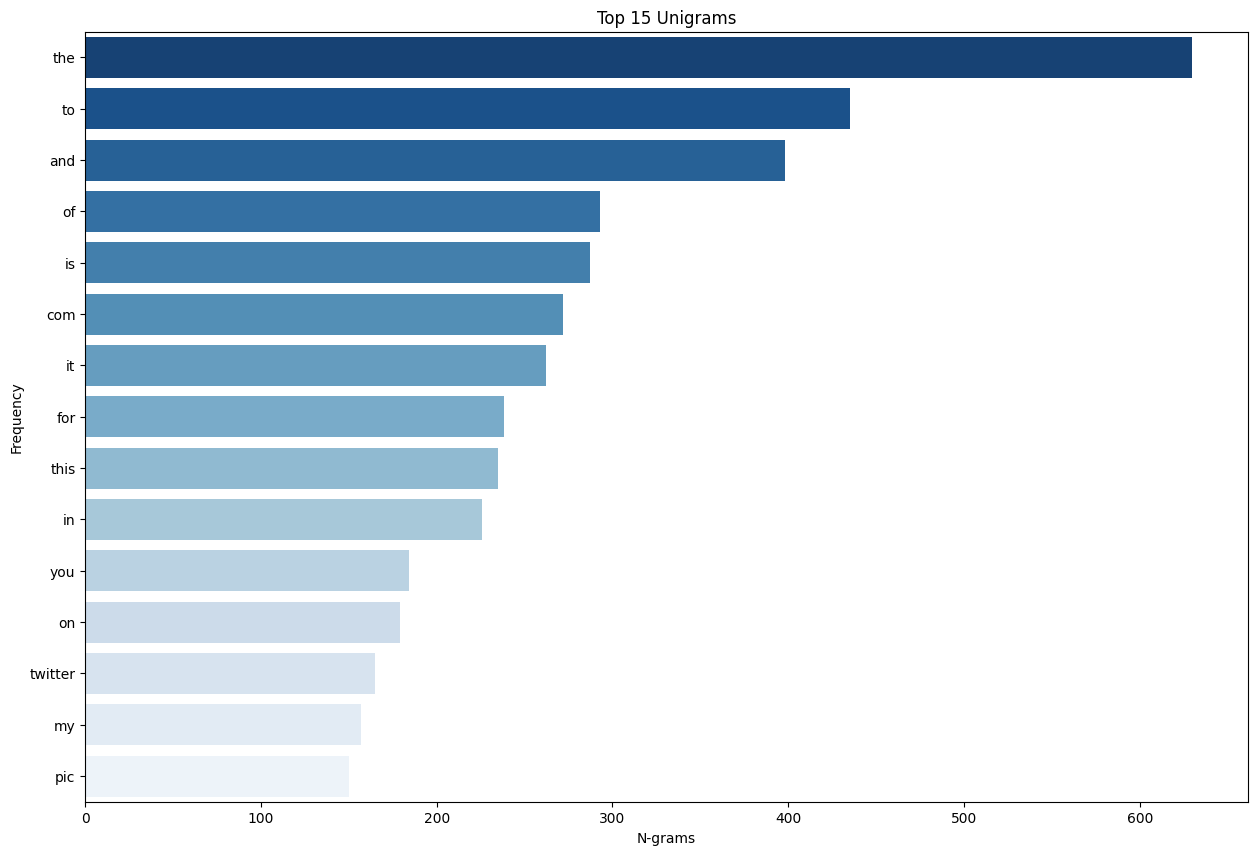

In [ ]:
 unigram_df2 = get_top_text_ngrams(ngram=1)
 plt.figure(figsize=(15, 10))
 sns.barplot(data=unigram_df2, x='Frequency', y='N-grams', palette='Blues_r')
 plt.title('Top 15 Unigrams')
 plt.xlabel('N-grams')
 plt.ylabel('Frequency')
 plt.show()

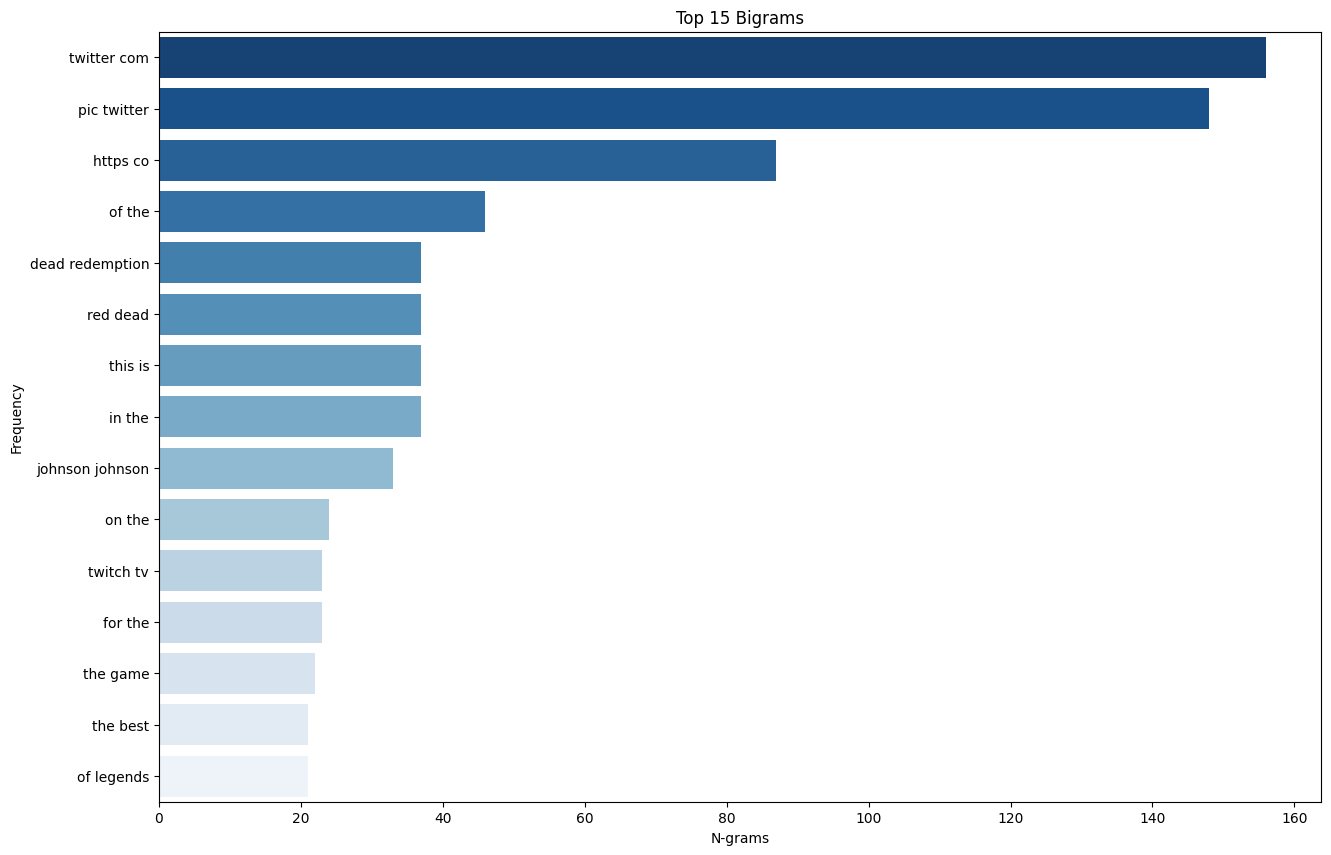

In [ ]:
 bigram_df2 = get_top_text_ngrams(ngram=2)
 plt.figure(figsize=(15, 10))
 sns.barplot(data=bigram_df2, x='Frequency', y='N-grams', palette='Blues_r')
 plt.title('Top 15 Bigrams')
 plt.xlabel('N-grams')
 plt.ylabel('Frequency')
 plt.show()

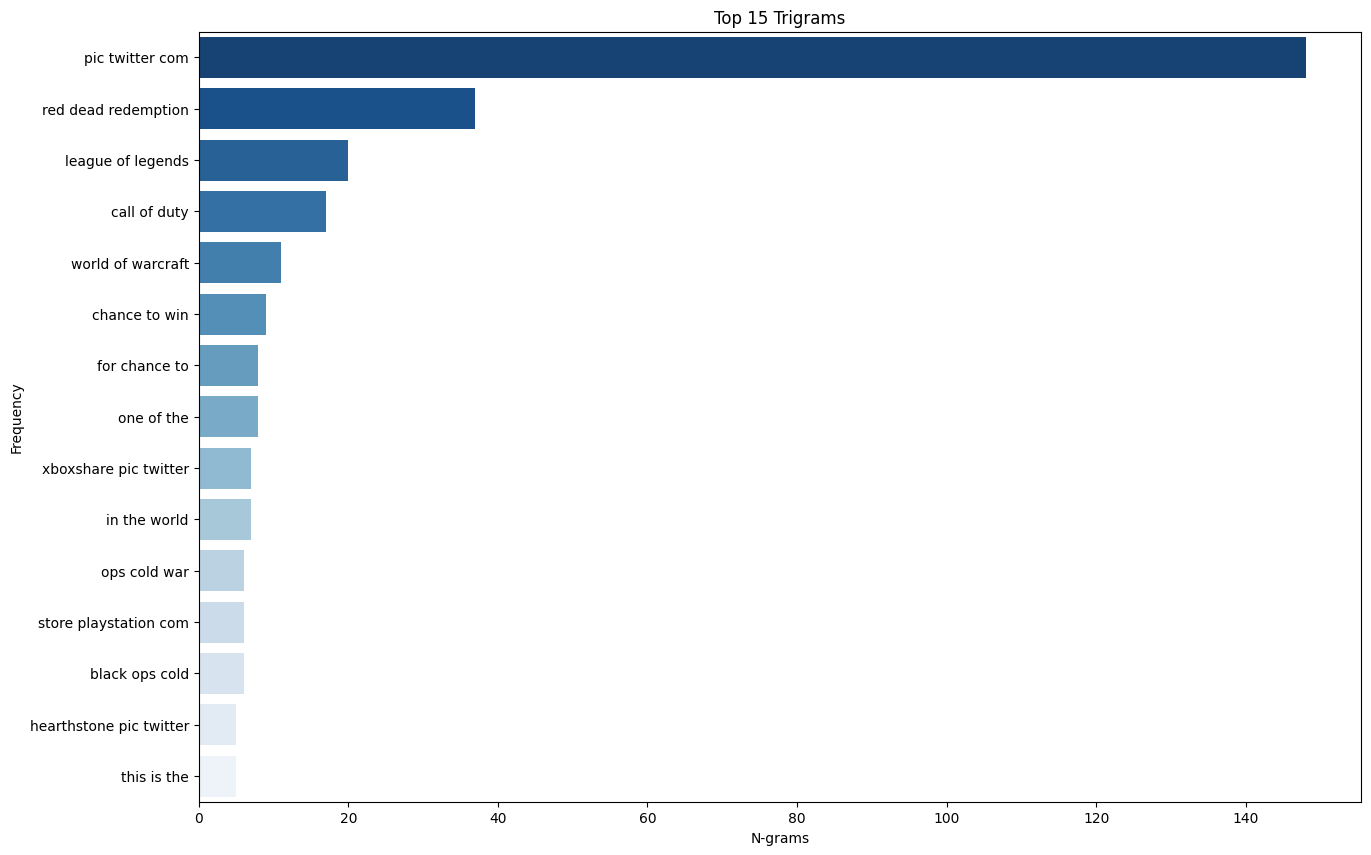

In [ ]:
 trigram_df2 = get_top_text_ngrams(ngram=3)
 plt.figure(figsize=(15, 10))
 sns.barplot(data=trigram_df2, x='Frequency', y='N-grams', palette='Blues_r')
 plt.title('Top 15 Trigrams')
 plt.xlabel('N-grams')
 plt.ylabel('Frequency')
 plt.show()